Data Understanding and Exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [3]:
df = pd.read_csv("risk_factors_cervical_cancer.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [6]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [8]:
df.isnull().count()

Age                                   858
Number of sexual partners             858
First sexual intercourse              858
Num of pregnancies                    858
Smokes                                858
Smokes (years)                        858
Smokes (packs/year)                   858
Hormonal Contraceptives               858
Hormonal Contraceptives (years)       858
IUD                                   858
IUD (years)                           858
STDs                                  858
STDs (number)                         858
STDs:condylomatosis                   858
STDs:cervical condylomatosis          858
STDs:vaginal condylomatosis           858
STDs:vulvo-perineal condylomatosis    858
STDs:syphilis                         858
STDs:pelvic inflammatory disease      858
STDs:genital herpes                   858
STDs:molluscum contagiosum            858
STDs:AIDS                             858
STDs:HIV                              858
STDs:Hepatitis B                  

In [9]:
df.replace('?', np.nan, inplace=True)

In [10]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

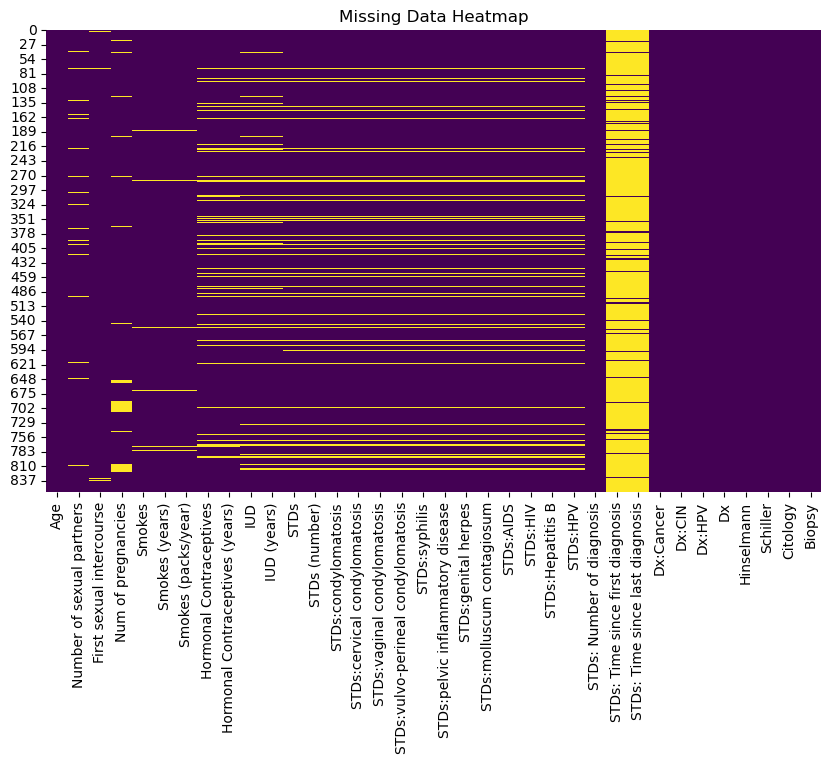

In [11]:
# Visualizing the missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [12]:
# Filling numerical columns with median
numerical_columns = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 
                     'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 
                     'STDs (number)']

df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [14]:
# Filling numerical columns with mode
categorical_columns = ['Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
                       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 
                       'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 
                       'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV']

df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [20]:
df.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                  

EXPLORATORY DATA ANALYSIS

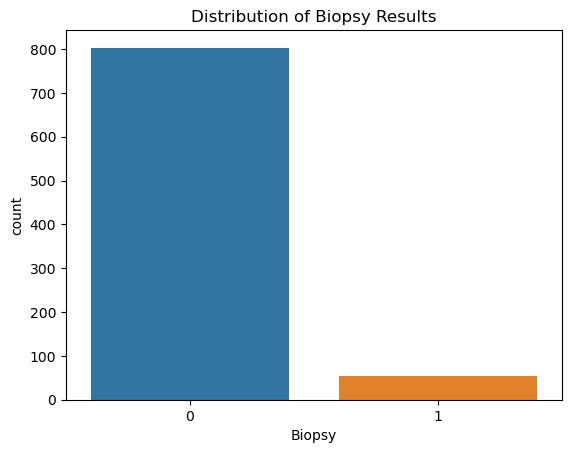

In [16]:
# Plotting the distribution of the target variable

sns.countplot(x='Biopsy', data=df)
plt.title('Distribution of Biopsy Results')
plt.show()

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


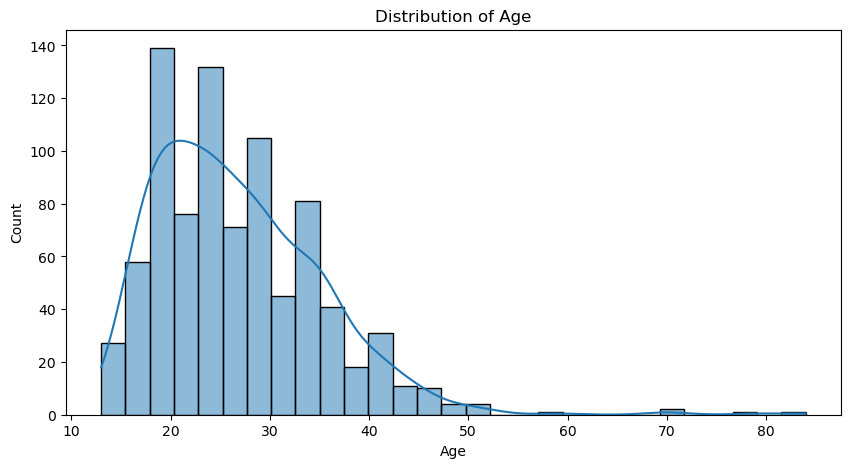

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


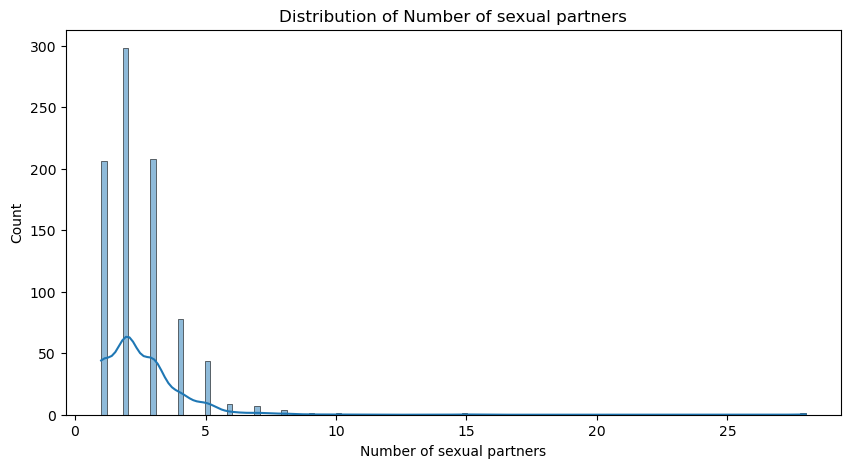

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


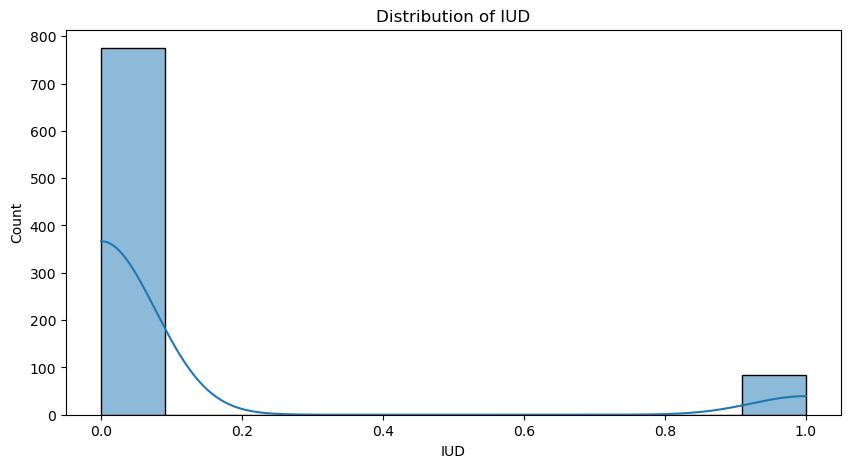

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


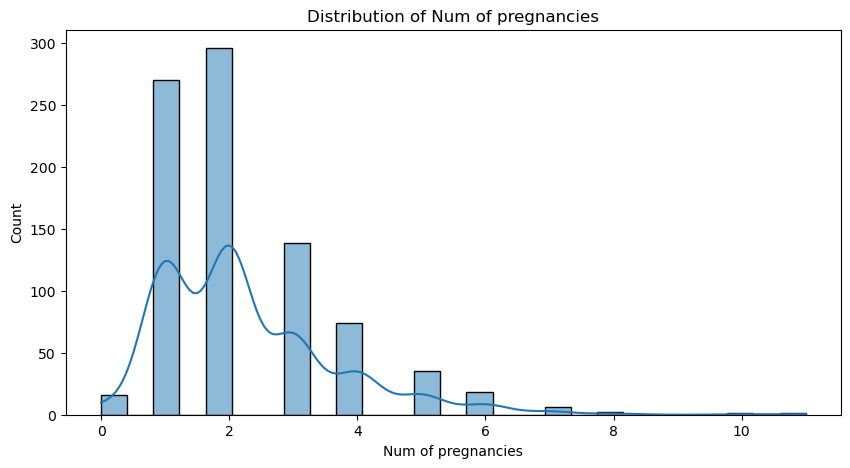

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


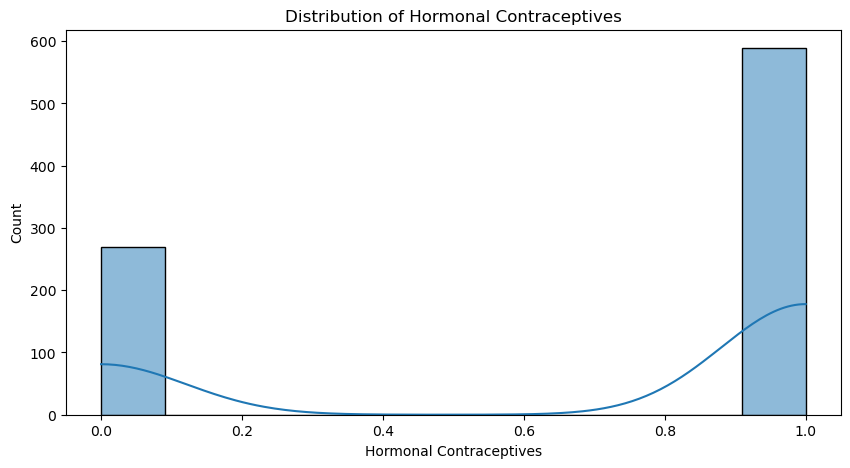

In [23]:
# Plotting the distribution of key features
key_features = ['Age', 'Number of sexual partners', 'IUD', 'Num of pregnancies', 'Hormonal Contraceptives']

for key_feature in key_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[key_feature].dropna(), kde=True)
    plt.title(f'Distribution of {key_feature}')
    plt.show()


In [22]:
# Convert columns to numeric, forcing errors to NaN (if any)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
